# Summarize delay between collection and submission dates

## Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import gamma, nbinom

%matplotlib inline

In [2]:
sns.set_style("ticks")

In [78]:
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["font.size"] = 14
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["xtick.labelsize"] = 14
mpl.rcParams["ytick.labelsize"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.facecolor"] = "white"

In [75]:
metadata_path = "../data/natural/h3n2/metadata.tsv"

figure_path = "../results/figures/distribution_of_delays.pdf"

## Prepare metadata

In [5]:
metadata = pd.read_csv(
    metadata_path,
    sep="\t"
)

In [6]:
metadata.head()

,strain,virus,accession,date,submission_date,region,country,division,location,passage,submitting_lab,age,gender
0,A/Ningbo/1246/2004,flu,EPI360859,2004-09-21,2016-09-03,china,china,zhejiang,ningbo,undetermined,other_database_import,?,?
1,A/Basel/USB0026554/2017,flu,EPI1569085,2017-01-13,2019-08-26,europe,switzerland,basel,basel,undetermined,import_from_public_domain,?,?
2,A/Jeonbuk/2217/2007,flu,EPI254261,2007-01-21,2016-09-03,japan_korea,south_korea,seoul,gangnam,undetermined,other_database_import,?,?
3,A/Guyane/439/2019,flu,EPI1507887,2019-04-29,2019-08-02,south_america,french_guiana,french_guiana,french_guiana,unpassaged,centers_for_disease_control_and_prevention,25y,male
4,A/NewYork/1009/2006,flu,EPI524474,2006-01-12,2016-09-03,north_america,usa,new_york,new_york,undetermined,other_database_import,4m,male


Drop records with ambiguous collection or submission dates. We need complete dates for both fields to calculate the distribution of the delay between collection and submission.

In [7]:
filtered_metadata = metadata[
    (~metadata["date"].str.contains("X")) &
    (~metadata["submission_date"].str.contains("X"))
].copy()

In [8]:
metadata.shape

(77786, 13)

In [9]:
filtered_metadata.shape

(73066, 13)

Convert date fields into timestamps.

In [10]:
filtered_metadata["date"] = pd.to_datetime(filtered_metadata["date"])
filtered_metadata["submission_date"] = pd.to_datetime(filtered_metadata["submission_date"])

In [11]:
filtered_metadata.head()

,strain,virus,accession,date,submission_date,region,country,division,location,passage,submitting_lab,age,gender
0,A/Ningbo/1246/2004,flu,EPI360859,2004-09-21,2016-09-03,china,china,zhejiang,ningbo,undetermined,other_database_import,?,?
1,A/Basel/USB0026554/2017,flu,EPI1569085,2017-01-13,2019-08-26,europe,switzerland,basel,basel,undetermined,import_from_public_domain,?,?
2,A/Jeonbuk/2217/2007,flu,EPI254261,2007-01-21,2016-09-03,japan_korea,south_korea,seoul,gangnam,undetermined,other_database_import,?,?
3,A/Guyane/439/2019,flu,EPI1507887,2019-04-29,2019-08-02,south_america,french_guiana,french_guiana,french_guiana,unpassaged,centers_for_disease_control_and_prevention,25y,male
4,A/NewYork/1009/2006,flu,EPI524474,2006-01-12,2016-09-03,north_america,usa,new_york,new_york,undetermined,other_database_import,4m,male


## Calculate and plot delay between collection and submission

In [12]:
filtered_metadata["submission_delay"] = filtered_metadata["submission_date"] - filtered_metadata["date"]

In [13]:
filtered_metadata.head()

,strain,virus,accession,date,submission_date,region,country,division,location,passage,submitting_lab,age,gender,submission_delay
0,A/Ningbo/1246/2004,flu,EPI360859,2004-09-21,2016-09-03,china,china,zhejiang,ningbo,undetermined,other_database_import,?,?,4365 days
1,A/Basel/USB0026554/2017,flu,EPI1569085,2017-01-13,2019-08-26,europe,switzerland,basel,basel,undetermined,import_from_public_domain,?,?,955 days
2,A/Jeonbuk/2217/2007,flu,EPI254261,2007-01-21,2016-09-03,japan_korea,south_korea,seoul,gangnam,undetermined,other_database_import,?,?,3513 days
3,A/Guyane/439/2019,flu,EPI1507887,2019-04-29,2019-08-02,south_america,french_guiana,french_guiana,french_guiana,unpassaged,centers_for_disease_control_and_prevention,25y,male,95 days
4,A/NewYork/1009/2006,flu,EPI524474,2006-01-12,2016-09-03,north_america,usa,new_york,new_york,undetermined,other_database_import,4m,male,3887 days


In [14]:
filtered_metadata["submission_delay"].describe()

count                           73066
mean     1001 days 21:49:04.702050208
std      1489 days 03:22:00.285664864
min                   5 days 00:00:00
25%                  84 days 00:00:00
50%                 277 days 00:00:00
75%                1341 days 00:00:00
max               41908 days 00:00:00
Name: submission_delay, dtype: object

In [15]:
delay_in_days = filtered_metadata["submission_delay"].dt.days.values

In [16]:
bins = np.linspace(
    0,
    delay_in_days.max(),
    100
)

Text(0,0.5,'Number of strains')

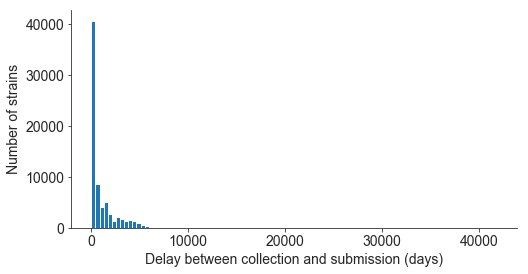

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(delay_in_days, bins=bins)
ax.set_xlabel("Delay between collection and submission (days)")
ax.set_ylabel("Number of strains")

To understand how the delay between collection and submission changed over time, we inspect the distribution in sliding windows that match our original forecasting analysis (6 year windows, sliding by 6 months).

In [18]:
end_dates = pd.date_range(
    "2006-01-01",
    "2020-01-01",
    freq="6MS"
)

In [19]:
years_back = pd.DateOffset(years=6)

In [20]:
end_dates.shape

(29,)

In [21]:
delay_in_days.max()

41908

In [22]:
delay_in_days = filtered_metadata["submission_delay"].dt.days.values

In [23]:
bins = np.arange(0, 5000, 30)

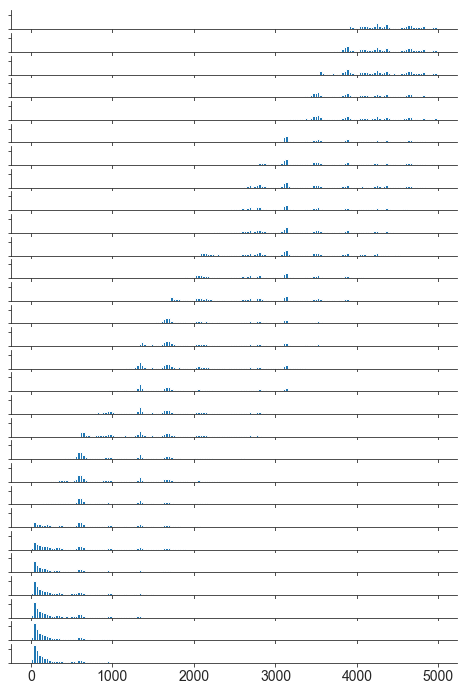

In [24]:
start_dates = []
mean_delays = []
std_delays = []

fig, axes = plt.subplots(
    nrows=end_dates.shape[0],
    ncols=1,
    figsize=(8, 12),
    sharex=True,
    sharey=True
)

for end_date, ax in zip(end_dates, axes.flatten()):
    start_date = end_date - years_back
    window_metadata = filtered_metadata[
        (filtered_metadata["date"] >= start_date) &
        (filtered_metadata["date"] < end_date)
    ]
    window_delay_in_days = window_metadata["submission_delay"].dt.days.values
    
    start_dates.append(start_date)
    mean_delays.append(window_delay_in_days.mean())
    std_delays.append(window_delay_in_days.std())
    ax.hist(
        window_delay_in_days,
        bins=bins,
        density=True
    )
    ax.set_yticklabels([])

In [25]:
start_dates = pd.to_datetime(start_dates)

Text(0,0.5,'Delay between collection and submission')

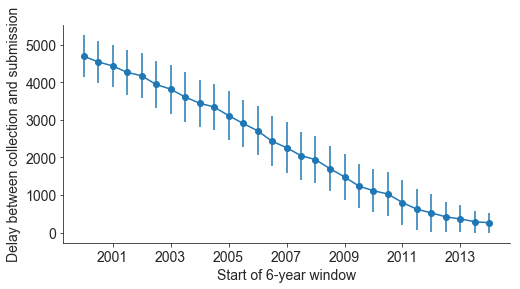

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.errorbar(
    start_dates,
    mean_delays,
    std_delays,
    marker="o",
    fmt=""
)
ax.set_xlabel("Start of 6-year window")
ax.set_ylabel("Delay between collection and submission")

## Investigate distribution of delays in the last complete year

Filter records to those from the last year. These should have more reasonable and consistent submission delays.

In [27]:
recent_metadata = filtered_metadata[
    (filtered_metadata["date"] >= "2019-01-01") &
    (filtered_metadata["date"] < "2020-01-01")
].copy()

In [28]:
filtered_metadata.shape

(73066, 14)

In [29]:
recent_metadata.shape

(11218, 14)

In [30]:
filtered_metadata.shape[0] - recent_metadata.shape[0]

61848

In [31]:
recent_metadata.shape[0] / filtered_metadata.shape[0]

0.1535324227410834

In [32]:
delay_in_days = recent_metadata["submission_delay"].dt.days.values

In [33]:
bins = np.linspace(
    0,
    delay_in_days.max(),
    100
)

Text(0,0.5,'Number of strains')

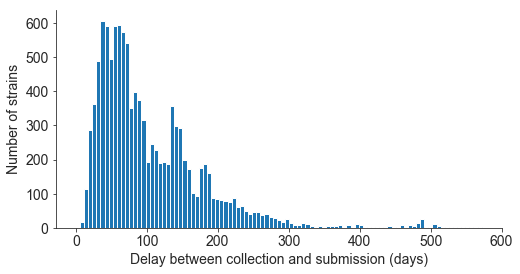

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(delay_in_days, bins=bins)
ax.set_xlabel("Delay between collection and submission (days)")
ax.set_ylabel("Number of strains")

In [35]:
delay_in_days.mean()

103.93537172401497

In [36]:
delay_in_days.min()

7

In [37]:
(delay_in_days <= 31).sum()

977

In [38]:
delay_in_days.shape

(11218,)

In [39]:
(delay_in_days <= 31).sum() / delay_in_days.shape[0]

0.08709217329292208

In [40]:
(delay_in_days <= 62).sum()

4030

In [41]:
(delay_in_days <= 62).sum() / delay_in_days.shape[0]

0.3592440720270993

In [42]:
recent_metadata[recent_metadata["submission_delay"].dt.days > 400]["submitting_lab"].value_counts()

microbiology_services_colindale,_public_health_england              97
centers_for_disease_control_and_prevention                          11
niigata_university                                                   3
who_national_influenza_centre_russian_federation                     2
who_collaborating_centre_for_reference_and_research_on_influenza     2
Name: submitting_lab, dtype: int64

Text(0,0.5,'Density')

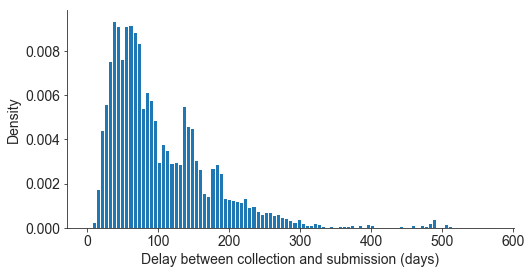

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(delay_in_days, bins=bins, density=True)
ax.set_xlabel("Delay between collection and submission (days)")
ax.set_ylabel("Density")

## Find a gamma distribution that matches the empirical distribution

Find gamma distribution parameters that best correspond to the observed delay in days for the last year using maximum likelihood estimation.

In [44]:
shape, loc, scale = gamma.fit(delay_in_days)

In [45]:
shape

1.8671767801174228

In [46]:
loc

6.965981588630028

In [47]:
scale

51.93367387724644

Generate and plot random values from the gamma distribution matching the MLE parameters from the empirical distribution.

In [48]:
gamma_data = gamma.rvs(
    a=shape,
    loc=loc,
    scale=scale,
    size=delay_in_days.shape[0]
)

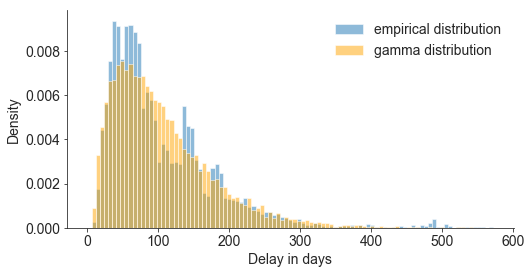

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(
    delay_in_days,
    bins=bins,
    density=True,
    alpha=0.5,
    label="empirical distribution"
)
values, hist_bins, patches = ax.hist(
    gamma_data,
    bins=bins,
    density=True,
    color="orange",
    alpha=0.5,
    label="gamma distribution"
)

ax.set_xlabel("Delay in days")
ax.set_ylabel("Density")
ax.legend(
    frameon=False
)

In [50]:
gamma_data.min()

7.1955825736269

In [51]:
gamma_data.mean()

105.13901002715424

In [52]:
delay_in_days.mean()

103.93537172401497

In [53]:
shape

1.8671767801174228

In [54]:
scale

51.93367387724644

In [55]:
shape * scale

96.96934996978533

In [56]:
loc

6.965981588630028

In [57]:
ideal_scale = scale / 3.0

In [58]:
ideal_scale

17.311224625748814

In [59]:
shape * ideal_scale

32.32311665659511

In [60]:
ideal_gamma_data = gamma.rvs(
    a=shape,
    loc=loc,
    scale=ideal_scale,
    size=delay_in_days.shape[0]
)

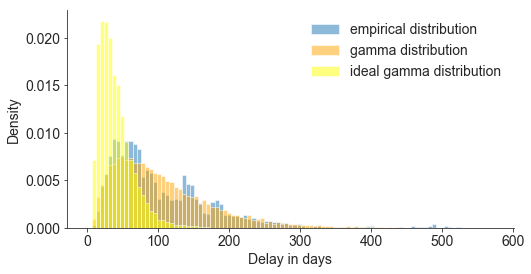

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(
    delay_in_days,
    bins=bins,
    density=True,
    alpha=0.5,
    label="empirical distribution"
)

values, hist_bins, patches = ax.hist(
    gamma_data,
    bins=bins,
    density=True,
    color="orange",
    alpha=0.5,
    label="gamma distribution"
)

values, hist_bins, patches = ax.hist(
    ideal_gamma_data,
    bins=bins,
    density=True,
    color="yellow",
    alpha=0.5,
    label="ideal gamma distribution"
)

ax.set_xlabel("Delay in days")
ax.set_ylabel("Density")
ax.legend(
    frameon=False
)

In [62]:
ideal_gamma_data.min()

7.120609712569673

In [63]:
ideal_shape = shape / 3.0

In [64]:
ideal_shape

0.6223922600391409

In [65]:
ideal_shape * scale

32.32311665659511

In [66]:
ideal_gamma_data_by_shape = gamma.rvs(
    a=ideal_shape,
    loc=loc,
    scale=scale,
    size=delay_in_days.shape[0]
)

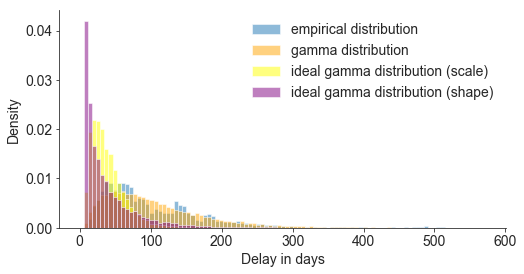

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(
    delay_in_days,
    bins=bins,
    density=True,
    alpha=0.5,
    label="empirical distribution"
)

values, hist_bins, patches = ax.hist(
    gamma_data,
    bins=bins,
    density=True,
    color="orange",
    alpha=0.5,
    label="gamma distribution"
)

values, hist_bins, patches = ax.hist(
    ideal_gamma_data,
    bins=bins,
    density=True,
    color="yellow",
    alpha=0.5,
    label="ideal gamma distribution (scale)"
)

values, hist_bins, patches = ax.hist(
    ideal_gamma_data_by_shape,
    bins=bins,
    density=True,
    color="purple",
    alpha=0.5,
    label="ideal gamma distribution (shape)"
)


ax.set_xlabel("Delay in days")
ax.set_ylabel("Density")
ax.legend(
    frameon=False
)

In [68]:
ideal_gamma_data_by_shape.min()

6.96599450755683

In [69]:
(ideal_gamma_data < 31).sum() / ideal_gamma_data.shape[0]

0.4468711000178285

In [70]:
(ideal_gamma_data < 62).sum() / ideal_gamma_data.shape[0]

0.8487252629702264

In [71]:
(ideal_gamma_data_by_shape < 31).sum() / ideal_gamma_data_by_shape.shape[0]

0.5915492957746479

In [72]:
(ideal_gamma_data_by_shape < 62).sum() / ideal_gamma_data_by_shape.shape[0]

0.8111962916740952

In [73]:
ideal_gamma_data.mean()

39.1916191268706

In [74]:
ideal_gamma_data_by_shape.mean()

38.96864962129439

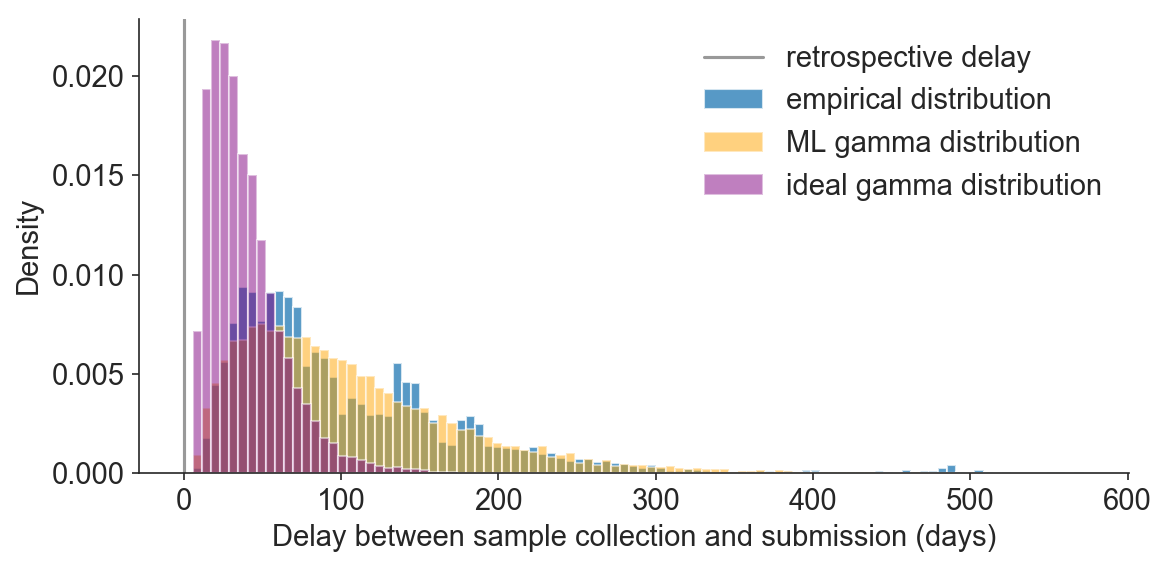

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
values, hist_bins, patches = ax.hist(
    delay_in_days,
    bins=bins,
    density=True,
    alpha=0.75,
    label="empirical distribution"
)

values, hist_bins, patches = ax.hist(
    gamma_data,
    bins=bins,
    density=True,
    color="orange",
    alpha=0.5,
    label="ML gamma distribution"
)

values, hist_bins, patches = ax.hist(
    ideal_gamma_data,
    bins=bins,
    density=True,
    color="purple",
    alpha=0.5,
    label="ideal gamma distribution"
)

ax.axvline(
    x=0,
    color="#999999",
    label="retrospective delay"
)

ax.set_xlabel("Delay between sample collection and submission (days)")
ax.set_ylabel("Density")
ax.legend(
    frameon=False
)

plt.tight_layout()
plt.savefig(figure_path)